In [134]:

"""
数据探索流程（初始篇）
1.变量识别
    判断数据变量的类型：离散还是有序
2.单变量分析
    连续性变量
        概括性度量：describe
        图形：直方
        检验：
    分类型变量
        根据频率去检验其分布
3.双变量分析
    连续性与连续性：
        散点图和相关性系数去判定。散点图看出是否存在线性关系，计算相关系数判断关系强弱
    分类型与分类型
        交叉分组表，堆积条形图和卡方检验
    分类型和连续性
        t检验和方差分析
4.处理缺失值
    删除
    替代：
        均值/中位数/众数
    预测模型
        以没有缺失值的数据作为训练数据，有缺失值作为测试数据。预测缺失值
        缺点：变量之间没有关系，预测不准确
    KNN替代
        优点：分类型和连续性都可以操作
        缺点：太费事件
5.处理异常值
    检测异常值：
        图形：箱图/直方图/散点图
        在1.5倍的四分位差之外的数据定为异常值
        在数据5%-95%之外的数据定为异常值
        在均值的三个标准差之外的数据
        用聚类方法检测异常值
    处理异常值：
        删除：很少的一部分。或者录入错误
        转换变量和聚类：有时候通过一些简单的变量转换和聚类即可减少异常值对整体数据的影响
        替换：均值/中位数/众数
        分开处理：若为自然异常值，且数据较多，将其分为一组，做分析
-----------------------------------------------------------------------------------------------------------------

探索性分析->
    单变量分析：查看均值，模式，中位数，范围方差，最大值，最小值，四分位和标准差
    双变量分析：用来找出两个不同变量之间是否存在关系，例如X和Y的散点图，看是否呈线性关系
    多变量分析：根据你的目标，有多种方法可以执行多变量分析，这些方法中的一些包括添加树，典型相关分析，聚类分析，对应分析/多重对应分析，因子分析，广义Procrustean分析，MANOVA，多维尺度，多元回归分析，偏最小二乘回归，主成分分析/回归/ PARAFAC和冗余分析。

    在做单变量分析的同时查看与目标变量的关系"""
--------------------------------------------------------------------------------------------------------------
"""
数据类型的转换和数据分析是共同进行的
1.如果是连续性变量看数据是否分布均匀，否则修改为离散变量
2.如果是离散型变量则对离散型变量进行分箱处理
"""
--------------------------------------------------------------------------------------------------------------      

"""
survival Survival 0 = No, 1 = Yes   # 是否生存
pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd # 船舱等级
sex Sex  # 性别
Age Age in years #年龄，可对年龄做柱形分布图，然后改离散型 。计算每个年龄段生存和死亡人数
sibsp # of siblings / spouses aboard the Titanic  # 
parch # of parents / children aboard the Titanic 
ticket Ticket number # 船票号码
fare Passenger fare  # 船票价格，做离散
cabin Cabin number  # 船舱号码，做离散
embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton"""

# 以下处理思路
1.查看数据类型：离散还是连续（优先连续）
2.单变量分析：
    2.1对分布均匀的连续变量不理会（通过单变量统计量分析），对分布不均匀的连续型变量进行分箱离散化
    2.2对离散型型变量进行one-hot处理
3.双变量分析：
    3.1 离散：对每个变量和目标变量进行分析
    3.2 连续：
        3.2.1直接相关系数展示（可展示具有相关性的变量）
        3.2.2对两个或者以上相关变量可进行组合
4.建立神经网络模型
5.通过查看查准率和损失折线图进行分析模型效果 
6.建立其他模型的交叉验证箱型图展示结果

<class 'pandas.core.frame.DataFrame'>


'\nsurvival Survival 0 = No, 1 = Yes   # 是否生存\npclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd # 船舱等级\nsex Sex  # 性别\nAge Age in years #年龄，可对年龄做柱形分布图，然后改离散型 。计算每个年龄段生存和死亡人数\nsibsp # of siblings / spouses aboard the Titanic  # \nparch # of parents / children aboard the Titanic \nticket Ticket number # 船票号码\nfare Passenger fare  # 船票价格，做离散\ncabin Cabin number  # 船舱号码，做离散\nembarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton'

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
df_train  = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')

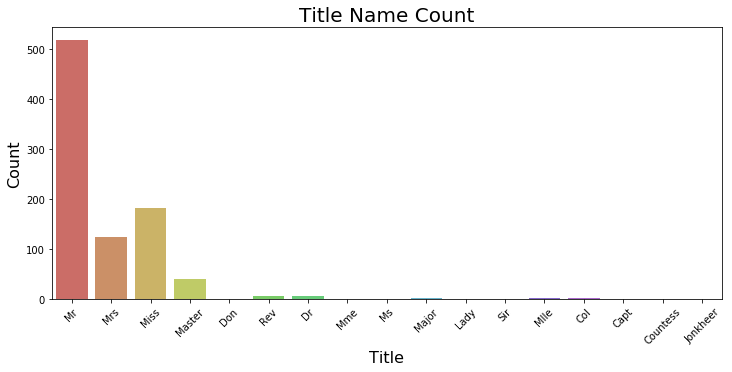

In [138]:
df_train['Title'] = df_train.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

#defining the figure size of our graphic
plt.figure(figsize=(12,5))

#Plotting the result
sns.countplot(x='Title', data=df_train, palette="hls")
plt.xlabel("Title", fontsize=16) #seting the xtitle and size
plt.ylabel("Count", fontsize=16) # Seting the ytitle and size
plt.title("Title Name Count", fontsize=20) 
plt.xticks(rotation=45)
plt.show()

In [139]:
#Doing the same on df_test with regular expressions
df_test['Title'] = df_test.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

In [140]:
Title_Dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
                   }
    
# we map each title to correct category
df_train['Title'] = df_train.Title.map(Title_Dictionary)
df_test['Title'] = df_test.Title.map(Title_Dictionary)

In [141]:
# 对年龄进行分布查看，然后定义连续还是离散
#Let's group the median age by sex, pclass and title, to have any idea and maybe input in Age NAN's
age_group = df_train.groupby(["Sex","Pclass","Title"])["Age"]

#printing the variabe that we created by median
print(age_group.median())

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    48.0
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64


In [142]:
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','Title']).Age.transform('median')

# printing the total of nulls in Age Feature
print(df_train["Age"].isnull().sum())

0


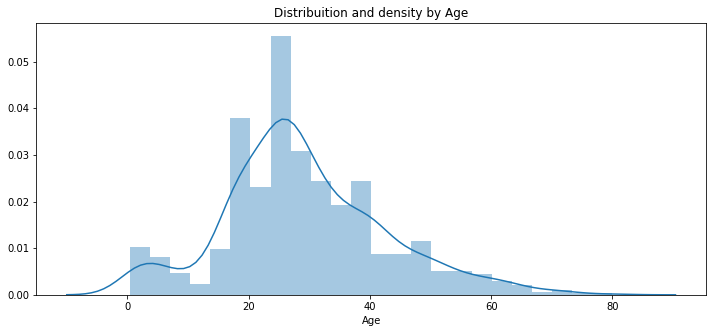

In [143]:
"""
以上为对名字和年龄离散化
以下为多变量分析：各个变量和目标变量之间的关系
"""


#Let's see the result of the inputation

#seting the figure size
plt.figure(figsize=(12,5))

#ploting again the Age Distribuition after the transformation in our dataset
sns.distplot(df_train["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")
plt.show()

<Figure size 864x360 with 0 Axes>

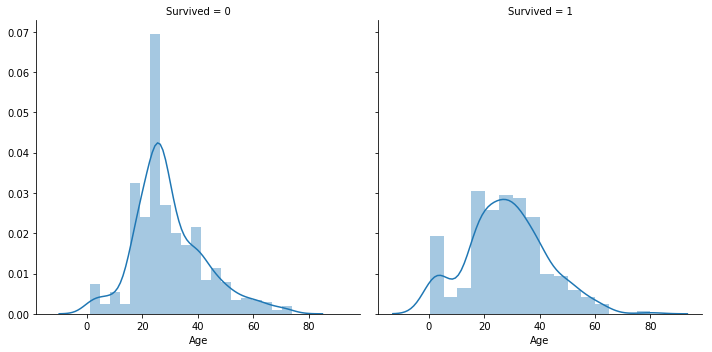

In [144]:
#separate by survivors or not

# figure size
plt.figure(figsize=(12,5))

# using facetgrid that is a great way to get information of our dataset
g = sns.FacetGrid(df_train, col='Survived',size=5)
g = g.map(sns.distplot, "Age")
plt.show()

In [145]:
#df_train.Age = df_train.Age.fillna(-0.5)

#creating the intervals that we need to cut each range of ages
interval = (0, 5, 12, 18, 25, 35, 60, 120) 

#Seting the names that we want use to the categorys
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

# Applying the pd.cut and using the parameters that we created 
df_train["Age_cat"] = pd.cut(df_train.Age, interval, labels=cats) # 统计区间数量

# Printing the new Category
df_train["Age_cat"].head()

0    Student
1      Adult
2      Young
3      Young
4      Young
Name: Age_cat, dtype: category
Categories (7, object): [babies < Children < Teen < Student < Young < Adult < Senior]

In [146]:
#Do the same to test dataset 
interval = (0, 5, 12, 18, 25, 35, 60, 120)

#same as the other df train
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

# same that we used above in df train
df_test["Age_cat"] = pd.cut(df_test.Age, interval, labels=cats)

Survived    0   1
Age_cat          
babies     15  33
Children   16   9
Teen       54  49
Student   108  56
Young     206  99
Adult     133  91
Senior     17   5


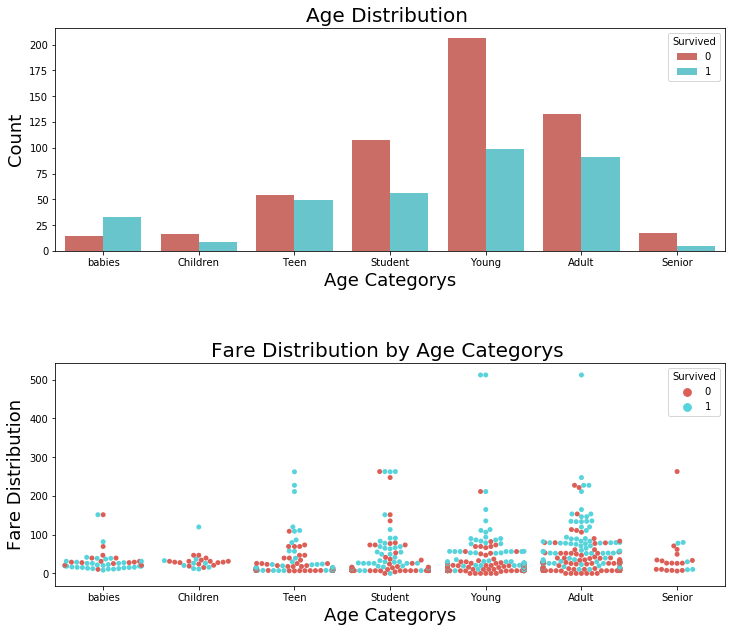

In [147]:
#Describe of categorical Age

# Using pd.crosstab to understand the Survived rate by Age Category's
print(pd.crosstab(df_train.Age_cat, df_train.Survived))

#Seting the figure size
plt.figure(figsize=(12,10))

#Plotting the result
plt.subplot(2,1,1)
sns.countplot("Age_cat",data=df_train,hue="Survived", palette="hls")
plt.ylabel("Count", fontsize=18)
plt.xlabel("Age Categorys", fontsize=18)
plt.title("Age Distribution ", fontsize=20)

plt.subplot(2,1,2)
sns.swarmplot(x='Age_cat',y="Fare",data=df_train,
              hue="Survived", palette="hls", )
plt.ylabel("Fare Distribution", fontsize=18)
plt.xlabel("Age Categorys", fontsize=18)
plt.title("Fare Distribution by Age Categorys ", fontsize=20)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

In [148]:
"""
分析目标变量下的年龄和船舱等级
"""
Age_fare = ['Pclass', 'Age_cat'] #seting the desired 

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train[Age_fare[0]], df_train[Age_fare[1]], 
            values=df_train['Fare'], aggfunc=['mean']).style.background_gradient(cmap = cm)

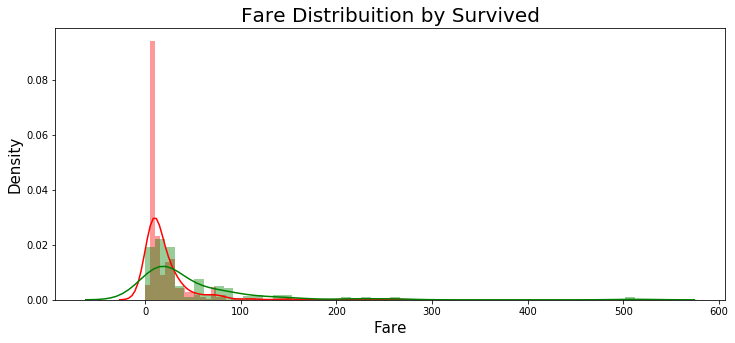

In [149]:
# Seting the figure size
plt.figure(figsize=(12,5))

# Understanding the Fare Distribuition 
sns.distplot(df_train[df_train.Survived == 0]["Fare"], 
             bins=50, color='r')
sns.distplot(df_train[df_train.Survived == 1]["Fare"], 
             bins=50, color='g')
plt.title("Fare Distribuition by Survived", fontsize=20)
plt.xlabel("Fare", fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

Survived    0    1
Fare_cat          
NoInf      14    1
quart_1   175   51
quart_2   155   62
quart_3   112   99
quart_4    93  129


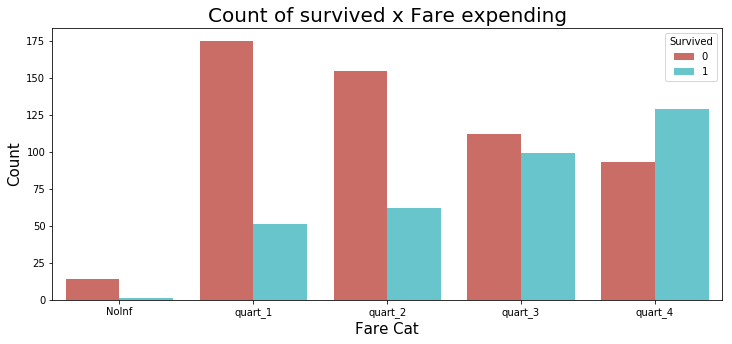

In [150]:
"""
对价格进行离散化，然后分析和目标变量的关系
"""
#Filling the NA's with -0.5
df_train.Fare = df_train.Fare.fillna(-0.5)

#intervals to categorize
quant = (-1, 0, 8, 15, 31, 600)

#Labels without input values
label_quants = ['NoInf', 'quart_1', 'quart_2', 'quart_3', 'quart_4']

#doing the cut in fare and puting in a new column
df_train["Fare_cat"] = pd.cut(df_train.Fare, quant, labels=label_quants)

#Description of transformation
print(pd.crosstab(df_train.Fare_cat, df_train.Survived))

plt.figure(figsize=(12,5))

#Plotting the new feature
sns.countplot(x="Fare_cat", hue="Survived", data=df_train, palette="hls")
plt.title("Count of survived x Fare expending",fontsize=20)
plt.xlabel("Fare Cat",fontsize=15)
plt.ylabel("Count",fontsize=15)

plt.show()
# 从数据上可得到，票价越高生存率越大

In [151]:
# Replicate the same to df_test
df_test.Fare = df_test.Fare.fillna(-0.5)

quant = (-1, 0, 8, 15, 31, 1000)
label_quants = ['NoInf', 'quart_1', 'quart_2', 'quart_3', 'quart_4']

df_test["Fare_cat"] = pd.cut(df_test.Fare, quant, labels=label_quants)

In [152]:
#Now lets drop the variable Fare, Age and ticket that is irrelevant now
del df_train["Fare"]
del df_train["Ticket"]
del df_train["Age"]
del df_train["Cabin"]
del df_train["Name"]

#same in df_test
del df_test["Fare"]
del df_test["Ticket"]
del df_test["Age"]
del df_test["Cabin"]
del df_test["Name"]

Total of Survived or not: 
Survived
0    549
1    342
Name: PassengerId, dtype: int64


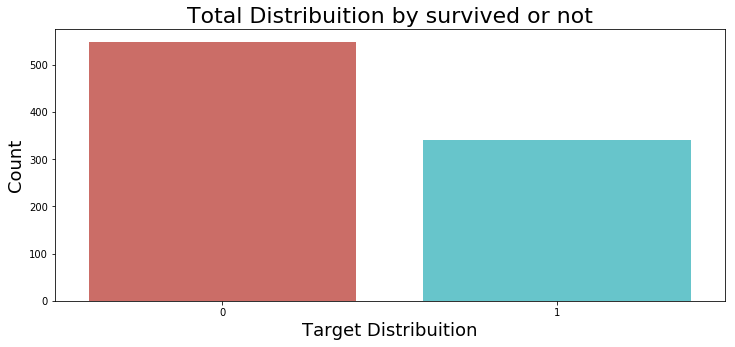

In [153]:
# Let see how many people die or survived
print("Total of Survived or not: ")
print(df_train.groupby("Survived")["PassengerId"].count())

plt.figure(figsize=(12,5))

sns.countplot(x="Survived", data=df_train,palette="hls")
plt.title('Total Distribuition by survived or not', fontsize=22)
plt.xlabel('Target Distribuition', fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.show()

Sex       female  male
Survived              
0             81   468
1            233   109


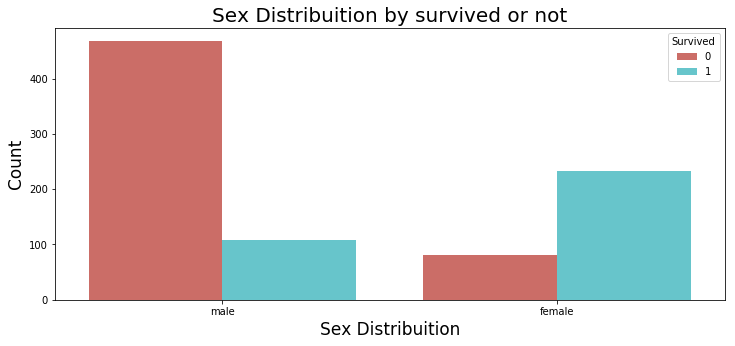

In [154]:
print(pd.crosstab(df_train.Survived, df_train.Sex))

plt.figure(figsize=(12,5))
sns.countplot(x="Sex", data=df_train, hue="Survived",palette="hls")
plt.title('Sex Distribuition by survived or not', fontsize=20)
plt.xlabel('Sex Distribuition',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353


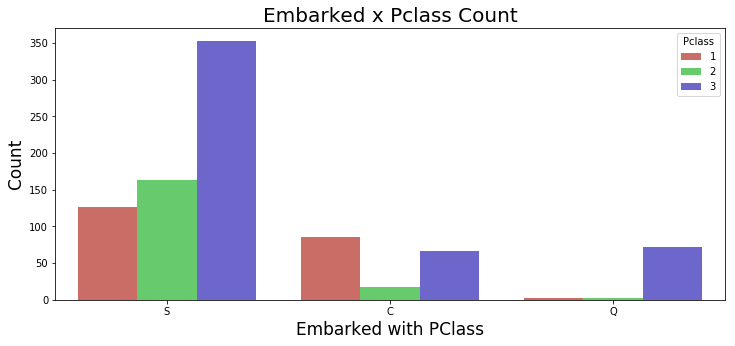

In [155]:
# Distribuition by class
print(pd.crosstab(df_train.Pclass, df_train.Embarked))

plt.figure(figsize=(12,5))

sns.countplot(x="Embarked", data=df_train, hue="Pclass",palette="hls")
plt.title('Embarked x Pclass Count', fontsize=20)
plt.xlabel('Embarked with PClass',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

In [156]:
#lets input the NA's with the highest frequency
df_train["Embarked"] = df_train["Embarked"].fillna('S')

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219


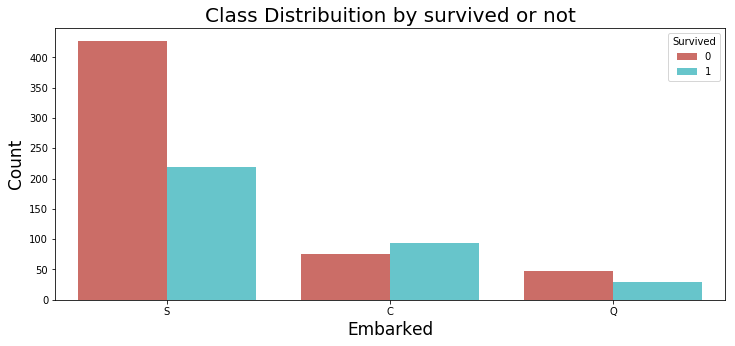

In [157]:
# Exploring Survivors vs Embarked
print(pd.crosstab(df_train.Survived, df_train.Embarked))

plt.figure(figsize=(12,5))

sns.countplot(x="Embarked", data=df_train, hue="Survived",palette="hls")
plt.title('Class Distribuition by survived or not',fontsize=20)
plt.xlabel('Embarked',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


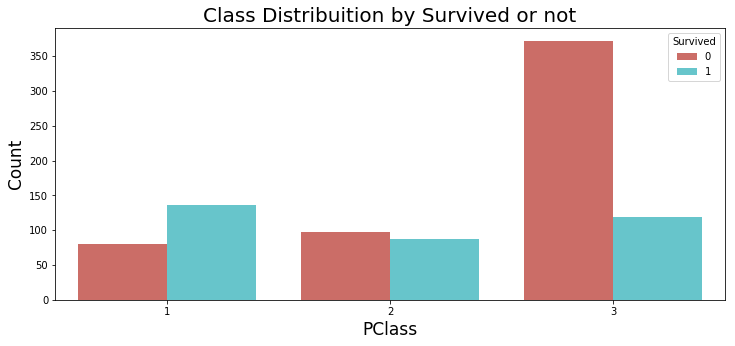

In [158]:
# Exploring Survivors vs Pclass
print(pd.crosstab(df_train.Survived, df_train.Pclass))

plt.figure(figsize=(12,5))

sns.countplot(x="Pclass", data=df_train, hue="Survived",palette="hls")
plt.xlabel('PClass',fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.title('Class Distribuition by Survived or not', fontsize=20)

plt.show()

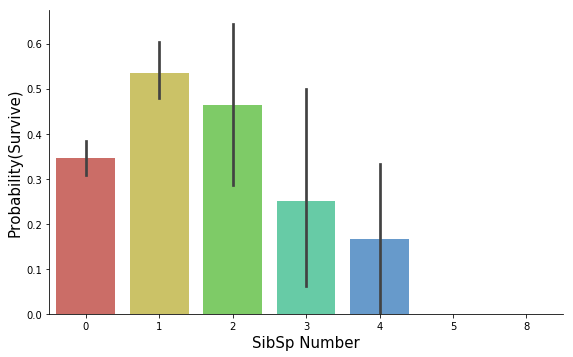

In [159]:
g = sns.factorplot(x="SibSp",y="Survived",data=df_train,
                   kind="bar", height = 5, aspect= 1.6, palette = "hls")
g.set_ylabels("Probability(Survive)", fontsize=15)
g.set_xlabels("SibSp Number", fontsize=15)

plt.show()

In [160]:
#Create a new column and sum the Parch + SibSp + 1 that refers the people self
df_train["FSize"] = df_train["Parch"] + df_train["SibSp"] + 1

df_test["FSize"] = df_test["Parch"] + df_test["SibSp"] + 1

Survived    0    1
FSize             
1         374  163
2          72   89
3          43   59
4           8   21
5          12    3
6          19    3
7           8    4
8           6    0
11          7    0


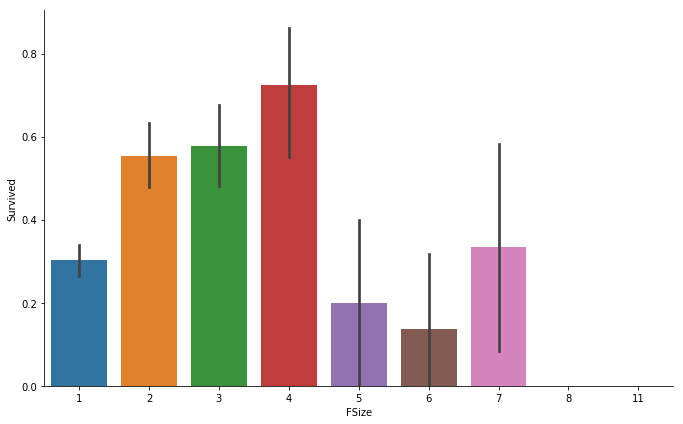

In [161]:
print(pd.crosstab(df_train.FSize, df_train.Survived))
sns.factorplot(x="FSize",y="Survived", data=df_train, kind="bar",size=6, aspect=1.6)
plt.show()

In [162]:
del df_train["SibSp"]
del df_train["Parch"]

del df_test["SibSp"]
del df_test["Parch"]

In [163]:
df_train = pd.get_dummies(df_train, columns=["Sex","Embarked","Age_cat","Fare_cat","Title"],\
                          prefix=["Sex","Emb","Age","Fare","Prefix"], drop_first=True)

df_test = pd.get_dummies(df_test, columns=["Sex","Embarked","Age_cat","Fare_cat","Title"],\
                         prefix=["Sex","Emb","Age","Fare","Prefix"], drop_first=True)

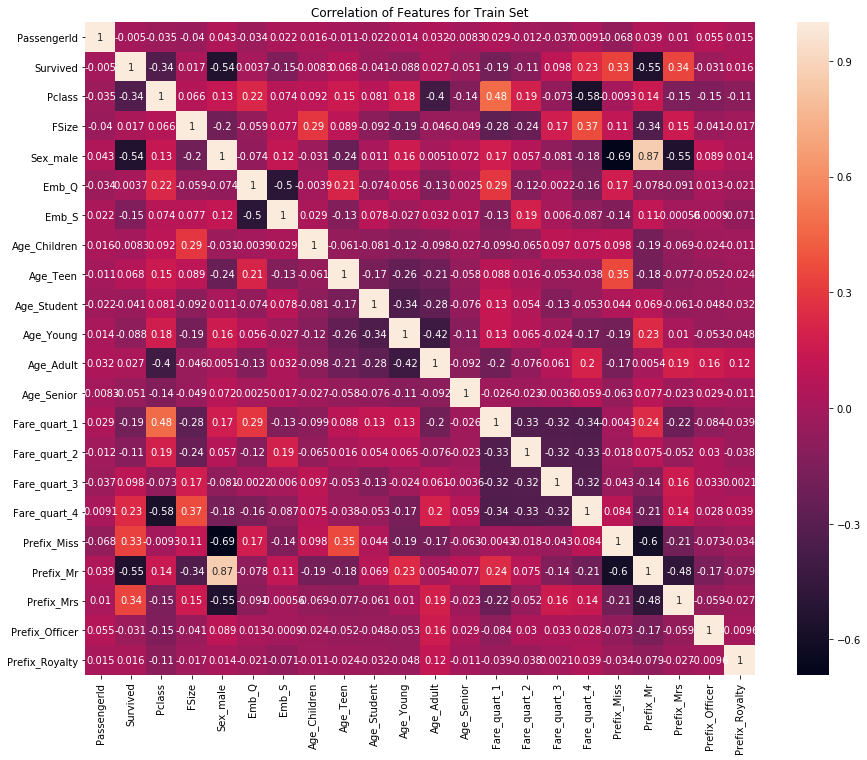

In [164]:
#Finallt, lets look the correlation of df_train
plt.figure(figsize=(15,12))
plt.title('Correlation of Features for Train Set')
sns.heatmap(df_train.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

In [165]:
train = df_train.drop(["Survived","PassengerId"],axis=1)
train_ = df_train["Survived"]

test_ = df_test.drop(["PassengerId"],axis=1)

X_train = train.values
y_train = train_.values

X_test = test_.values
X_test = X_test.astype(np.float64, copy=False)

In [166]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [207]:
"""
开始搭建模型
神经网络层：
    核心层
        输入空间维数
        激活层
        核函数
        输出空间维数
    优化器
    正则化（无效部分神经元）
    
"""
from keras.layers import Dense,Dropout,Activation
from keras.optimizers import SGD
from keras.models import Sequential
import graphviz # 画图工具
import keras

In [208]:
model = Sequential()
model.add(Dense(18,
               activation='relu',
               kernel_initializer='uniform',# 初始化权重
               input_dim=20 ))# 输入张量的shape
model.add(Dropout(0.50))
model.add(Dense(60,
                kernel_initializer='uniform',
                activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(1,
                kernel_initializer='uniform',
                activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 18)                378       
_________________________________________________________________
dropout_5 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 60)                1140      
_________________________________________________________________
dropout_6 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 61        
Total params: 1,579
Trainable params: 1,579
Non-trainable params: 0
_________________________________________________________________


In [209]:
sgd = SGD(lr=0.01,momentum=0.9) # 优化器 lr:学习率，momentum:加速相关SGD并抑制震荡,decay:每次更新时学习率下降
model.compile(optimizer=sgd,
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, 
               batch_size = 60, 
               epochs = 3000, verbose=2)

Epoch 1/3000
 - 1s - loss: 0.6901 - acc: 0.5724
Epoch 2/3000
 - 0s - loss: 0.6792 - acc: 0.6162
Epoch 3/3000
 - 0s - loss: 0.6717 - acc: 0.6162
Epoch 4/3000
 - 0s - loss: 0.6675 - acc: 0.6162
Epoch 5/3000
 - 0s - loss: 0.6662 - acc: 0.6162
Epoch 6/3000
 - 0s - loss: 0.6657 - acc: 0.6162
Epoch 7/3000
 - 0s - loss: 0.6652 - acc: 0.6162
Epoch 8/3000
 - 0s - loss: 0.6651 - acc: 0.6162
Epoch 9/3000
 - 0s - loss: 0.6645 - acc: 0.6162
Epoch 10/3000
 - 0s - loss: 0.6641 - acc: 0.6162
Epoch 11/3000
 - 0s - loss: 0.6637 - acc: 0.6162
Epoch 12/3000
 - 0s - loss: 0.6629 - acc: 0.6162
Epoch 13/3000
 - 0s - loss: 0.6620 - acc: 0.6162
Epoch 14/3000
 - 0s - loss: 0.6604 - acc: 0.6162
Epoch 15/3000
 - 0s - loss: 0.6581 - acc: 0.6162
Epoch 16/3000
 - 0s - loss: 0.6553 - acc: 0.6162
Epoch 17/3000
 - 0s - loss: 0.6503 - acc: 0.6162
Epoch 18/3000
 - 0s - loss: 0.6424 - acc: 0.6207
Epoch 19/3000
 - 0s - loss: 0.6302 - acc: 0.6453
Epoch 20/3000
 - 0s - loss: 0.6142 - acc: 0.6824
Epoch 21/3000
 - 0s - loss: 0

Epoch 168/3000
 - 0s - loss: 0.3902 - acc: 0.8384
Epoch 169/3000
 - 0s - loss: 0.3826 - acc: 0.8496
Epoch 170/3000
 - 0s - loss: 0.3775 - acc: 0.8496
Epoch 171/3000
 - 0s - loss: 0.3867 - acc: 0.8530
Epoch 172/3000
 - 0s - loss: 0.3837 - acc: 0.8541
Epoch 173/3000
 - 0s - loss: 0.3979 - acc: 0.8462
Epoch 174/3000
 - 0s - loss: 0.3865 - acc: 0.8541
Epoch 175/3000
 - 0s - loss: 0.3787 - acc: 0.8451
Epoch 176/3000
 - 0s - loss: 0.3847 - acc: 0.8496
Epoch 177/3000
 - 0s - loss: 0.3873 - acc: 0.8474
Epoch 178/3000
 - 0s - loss: 0.3807 - acc: 0.8485
Epoch 179/3000
 - 0s - loss: 0.3868 - acc: 0.8507
Epoch 180/3000
 - 0s - loss: 0.3840 - acc: 0.8519
Epoch 181/3000
 - 0s - loss: 0.3872 - acc: 0.8563
Epoch 182/3000
 - 0s - loss: 0.3933 - acc: 0.8507
Epoch 183/3000
 - 0s - loss: 0.3901 - acc: 0.8384
Epoch 184/3000
 - 0s - loss: 0.3782 - acc: 0.8507
Epoch 185/3000
 - 0s - loss: 0.3833 - acc: 0.8530
Epoch 186/3000
 - 0s - loss: 0.3758 - acc: 0.8530
Epoch 187/3000
 - 0s - loss: 0.3766 - acc: 0.8496


Epoch 332/3000
 - 0s - loss: 0.3758 - acc: 0.8440
Epoch 333/3000
 - 0s - loss: 0.3684 - acc: 0.8563
Epoch 334/3000
 - 0s - loss: 0.3597 - acc: 0.8541
Epoch 335/3000
 - 0s - loss: 0.3808 - acc: 0.8496
Epoch 336/3000
 - 0s - loss: 0.3686 - acc: 0.8530
Epoch 337/3000
 - 0s - loss: 0.3647 - acc: 0.8474
Epoch 338/3000
 - 0s - loss: 0.3684 - acc: 0.8496
Epoch 339/3000
 - 0s - loss: 0.3657 - acc: 0.8530
Epoch 340/3000
 - 0s - loss: 0.3751 - acc: 0.8507
Epoch 341/3000
 - 0s - loss: 0.3771 - acc: 0.8418
Epoch 342/3000
 - 0s - loss: 0.3727 - acc: 0.8586
Epoch 343/3000
 - 0s - loss: 0.3712 - acc: 0.8608
Epoch 344/3000
 - 0s - loss: 0.3611 - acc: 0.8485
Epoch 345/3000
 - 0s - loss: 0.3564 - acc: 0.8541
Epoch 346/3000
 - 0s - loss: 0.3737 - acc: 0.8575
Epoch 347/3000
 - 0s - loss: 0.3634 - acc: 0.8552
Epoch 348/3000
 - 0s - loss: 0.3767 - acc: 0.8350
Epoch 349/3000
 - 0s - loss: 0.3619 - acc: 0.8530
Epoch 350/3000
 - 0s - loss: 0.3710 - acc: 0.8418
Epoch 351/3000
 - 0s - loss: 0.3634 - acc: 0.8563


Epoch 496/3000
 - 0s - loss: 0.3695 - acc: 0.8563
Epoch 497/3000
 - 0s - loss: 0.3566 - acc: 0.8552
Epoch 498/3000
 - 0s - loss: 0.3635 - acc: 0.8620
Epoch 499/3000
 - 0s - loss: 0.3463 - acc: 0.8664
Epoch 500/3000
 - 0s - loss: 0.3534 - acc: 0.8608
Epoch 501/3000
 - 0s - loss: 0.3593 - acc: 0.8530
Epoch 502/3000
 - 0s - loss: 0.3614 - acc: 0.8575
Epoch 503/3000
 - 0s - loss: 0.3582 - acc: 0.8552
Epoch 504/3000
 - 0s - loss: 0.3680 - acc: 0.8474
Epoch 505/3000
 - 0s - loss: 0.3511 - acc: 0.8530
Epoch 506/3000
 - 0s - loss: 0.3565 - acc: 0.8541
Epoch 507/3000
 - 0s - loss: 0.3649 - acc: 0.8451
Epoch 508/3000
 - 0s - loss: 0.3508 - acc: 0.8597
Epoch 509/3000
 - 0s - loss: 0.3527 - acc: 0.8597
Epoch 510/3000
 - 0s - loss: 0.3485 - acc: 0.8597
Epoch 511/3000
 - 0s - loss: 0.3673 - acc: 0.8429
Epoch 512/3000
 - 0s - loss: 0.3577 - acc: 0.8664
Epoch 513/3000
 - 0s - loss: 0.3610 - acc: 0.8620
Epoch 514/3000
 - 0s - loss: 0.3577 - acc: 0.8586
Epoch 515/3000
 - 0s - loss: 0.3622 - acc: 0.8519


Epoch 660/3000
 - 0s - loss: 0.3560 - acc: 0.8519
Epoch 661/3000
 - 0s - loss: 0.3617 - acc: 0.8541
Epoch 662/3000
 - 0s - loss: 0.3650 - acc: 0.8462
Epoch 663/3000
 - 0s - loss: 0.3551 - acc: 0.8597
Epoch 664/3000
 - 0s - loss: 0.3506 - acc: 0.8507
Epoch 665/3000
 - 0s - loss: 0.3442 - acc: 0.8653
Epoch 666/3000
 - 0s - loss: 0.3568 - acc: 0.8563
Epoch 667/3000
 - 0s - loss: 0.3583 - acc: 0.8519
Epoch 668/3000
 - 0s - loss: 0.3454 - acc: 0.8664
Epoch 669/3000
 - 0s - loss: 0.3423 - acc: 0.8575
Epoch 670/3000
 - 0s - loss: 0.3484 - acc: 0.8575
Epoch 671/3000
 - 0s - loss: 0.3460 - acc: 0.8530
Epoch 672/3000
 - 0s - loss: 0.3494 - acc: 0.8676
Epoch 673/3000
 - 0s - loss: 0.3657 - acc: 0.8530
Epoch 674/3000
 - 0s - loss: 0.3422 - acc: 0.8664
Epoch 675/3000
 - 0s - loss: 0.3559 - acc: 0.8563
Epoch 676/3000
 - 0s - loss: 0.3383 - acc: 0.8721
Epoch 677/3000
 - 0s - loss: 0.3566 - acc: 0.8474
Epoch 678/3000
 - 0s - loss: 0.3612 - acc: 0.8563
Epoch 679/3000
 - 0s - loss: 0.3424 - acc: 0.8687


Epoch 824/3000
 - 0s - loss: 0.3442 - acc: 0.8631
Epoch 825/3000
 - 0s - loss: 0.3349 - acc: 0.8563
Epoch 826/3000
 - 0s - loss: 0.3600 - acc: 0.8474
Epoch 827/3000
 - 0s - loss: 0.3351 - acc: 0.8519
Epoch 828/3000
 - 0s - loss: 0.3494 - acc: 0.8586
Epoch 829/3000
 - 0s - loss: 0.3542 - acc: 0.8620
Epoch 830/3000
 - 0s - loss: 0.3579 - acc: 0.8485
Epoch 831/3000
 - 0s - loss: 0.3564 - acc: 0.8563
Epoch 832/3000
 - 0s - loss: 0.3613 - acc: 0.8384
Epoch 833/3000
 - 0s - loss: 0.3490 - acc: 0.8642
Epoch 834/3000
 - 0s - loss: 0.3540 - acc: 0.8597
Epoch 835/3000
 - 0s - loss: 0.3563 - acc: 0.8530
Epoch 836/3000
 - 0s - loss: 0.3510 - acc: 0.8530
Epoch 837/3000
 - 0s - loss: 0.3518 - acc: 0.8575
Epoch 838/3000
 - 0s - loss: 0.3476 - acc: 0.8530
Epoch 839/3000
 - 0s - loss: 0.3447 - acc: 0.8530
Epoch 840/3000
 - 0s - loss: 0.3561 - acc: 0.8530
Epoch 841/3000
 - 0s - loss: 0.3468 - acc: 0.8541
Epoch 842/3000
 - 0s - loss: 0.3462 - acc: 0.8676
Epoch 843/3000
 - 0s - loss: 0.3434 - acc: 0.8620


Epoch 988/3000
 - 0s - loss: 0.3481 - acc: 0.8620
Epoch 989/3000
 - 0s - loss: 0.3465 - acc: 0.8608
Epoch 990/3000
 - 0s - loss: 0.3631 - acc: 0.8429
Epoch 991/3000
 - 0s - loss: 0.3496 - acc: 0.8608
Epoch 992/3000
 - 0s - loss: 0.3407 - acc: 0.8552
Epoch 993/3000
 - 0s - loss: 0.3575 - acc: 0.8485
Epoch 994/3000
 - 0s - loss: 0.3256 - acc: 0.8765
Epoch 995/3000
 - 0s - loss: 0.3545 - acc: 0.8676
Epoch 996/3000
 - 0s - loss: 0.3438 - acc: 0.8586
Epoch 997/3000
 - 0s - loss: 0.3261 - acc: 0.8732
Epoch 998/3000
 - 0s - loss: 0.3361 - acc: 0.8575
Epoch 999/3000
 - 0s - loss: 0.3458 - acc: 0.8620
Epoch 1000/3000
 - 0s - loss: 0.3493 - acc: 0.8597
Epoch 1001/3000
 - 0s - loss: 0.3550 - acc: 0.8429
Epoch 1002/3000
 - 0s - loss: 0.3416 - acc: 0.8608
Epoch 1003/3000
 - 0s - loss: 0.3445 - acc: 0.8485
Epoch 1004/3000
 - 0s - loss: 0.3398 - acc: 0.8563
Epoch 1005/3000
 - 0s - loss: 0.3492 - acc: 0.8563
Epoch 1006/3000
 - 0s - loss: 0.3370 - acc: 0.8541
Epoch 1007/3000
 - 0s - loss: 0.3429 - acc:

Epoch 1149/3000
 - 0s - loss: 0.3486 - acc: 0.8530
Epoch 1150/3000
 - 0s - loss: 0.3359 - acc: 0.8676
Epoch 1151/3000
 - 0s - loss: 0.3481 - acc: 0.8496
Epoch 1152/3000
 - 0s - loss: 0.3472 - acc: 0.8530
Epoch 1153/3000
 - 0s - loss: 0.3551 - acc: 0.8552
Epoch 1154/3000
 - 0s - loss: 0.3425 - acc: 0.8507
Epoch 1155/3000
 - 0s - loss: 0.3416 - acc: 0.8552
Epoch 1156/3000
 - 0s - loss: 0.3415 - acc: 0.8608
Epoch 1157/3000
 - 0s - loss: 0.3445 - acc: 0.8451
Epoch 1158/3000
 - 0s - loss: 0.3395 - acc: 0.8631
Epoch 1159/3000
 - 0s - loss: 0.3399 - acc: 0.8676
Epoch 1160/3000
 - 0s - loss: 0.3475 - acc: 0.8474
Epoch 1161/3000
 - 0s - loss: 0.3434 - acc: 0.8653
Epoch 1162/3000
 - 0s - loss: 0.3295 - acc: 0.8653
Epoch 1163/3000
 - 0s - loss: 0.3530 - acc: 0.8507
Epoch 1164/3000
 - 0s - loss: 0.3524 - acc: 0.8462
Epoch 1165/3000
 - 0s - loss: 0.3528 - acc: 0.8631
Epoch 1166/3000
 - 0s - loss: 0.3475 - acc: 0.8563
Epoch 1167/3000
 - 0s - loss: 0.3426 - acc: 0.8462
Epoch 1168/3000
 - 0s - loss: 0

Epoch 1310/3000
 - 0s - loss: 0.3489 - acc: 0.8530
Epoch 1311/3000
 - 0s - loss: 0.3472 - acc: 0.8507
Epoch 1312/3000
 - 0s - loss: 0.3453 - acc: 0.8519
Epoch 1313/3000
 - 0s - loss: 0.3436 - acc: 0.8507
Epoch 1314/3000
 - 0s - loss: 0.3343 - acc: 0.8653
Epoch 1315/3000
 - 0s - loss: 0.3360 - acc: 0.8709
Epoch 1316/3000
 - 0s - loss: 0.3446 - acc: 0.8541
Epoch 1317/3000
 - 0s - loss: 0.3490 - acc: 0.8608
Epoch 1318/3000
 - 0s - loss: 0.3520 - acc: 0.8541
Epoch 1319/3000
 - 0s - loss: 0.3498 - acc: 0.8440
Epoch 1320/3000
 - 0s - loss: 0.3533 - acc: 0.8462
Epoch 1321/3000
 - 0s - loss: 0.3602 - acc: 0.8429
Epoch 1322/3000
 - 0s - loss: 0.3571 - acc: 0.8451
Epoch 1323/3000
 - 0s - loss: 0.3466 - acc: 0.8586
Epoch 1324/3000
 - 0s - loss: 0.3509 - acc: 0.8608
Epoch 1325/3000
 - 0s - loss: 0.3492 - acc: 0.8597
Epoch 1326/3000
 - 0s - loss: 0.3453 - acc: 0.8507
Epoch 1327/3000
 - 0s - loss: 0.3582 - acc: 0.8384
Epoch 1328/3000
 - 0s - loss: 0.3517 - acc: 0.8474
Epoch 1329/3000
 - 0s - loss: 0

Epoch 1471/3000
 - 0s - loss: 0.3501 - acc: 0.8541
Epoch 1472/3000
 - 0s - loss: 0.3416 - acc: 0.8552
Epoch 1473/3000
 - 0s - loss: 0.3555 - acc: 0.8541
Epoch 1474/3000
 - 0s - loss: 0.3495 - acc: 0.8496
Epoch 1475/3000
 - 0s - loss: 0.3321 - acc: 0.8575
Epoch 1476/3000
 - 0s - loss: 0.3506 - acc: 0.8485
Epoch 1477/3000
 - 0s - loss: 0.3371 - acc: 0.8530
Epoch 1478/3000
 - 0s - loss: 0.3453 - acc: 0.8563
Epoch 1479/3000
 - 0s - loss: 0.3471 - acc: 0.8608
Epoch 1480/3000
 - 0s - loss: 0.3426 - acc: 0.8507
Epoch 1481/3000
 - 0s - loss: 0.3412 - acc: 0.8575
Epoch 1482/3000
 - 0s - loss: 0.3417 - acc: 0.8608
Epoch 1483/3000
 - 0s - loss: 0.3488 - acc: 0.8687
Epoch 1484/3000
 - 0s - loss: 0.3316 - acc: 0.8743
Epoch 1485/3000
 - 0s - loss: 0.3374 - acc: 0.8575
Epoch 1486/3000
 - 0s - loss: 0.3385 - acc: 0.8653
Epoch 1487/3000
 - 0s - loss: 0.3419 - acc: 0.8406
Epoch 1488/3000
 - 0s - loss: 0.3461 - acc: 0.8597
Epoch 1489/3000
 - 0s - loss: 0.3438 - acc: 0.8575
Epoch 1490/3000
 - 0s - loss: 0

Epoch 1632/3000
 - 0s - loss: 0.3511 - acc: 0.8451
Epoch 1633/3000
 - 0s - loss: 0.3458 - acc: 0.8519
Epoch 1634/3000
 - 0s - loss: 0.3429 - acc: 0.8642
Epoch 1635/3000
 - 0s - loss: 0.3359 - acc: 0.8631
Epoch 1636/3000
 - 0s - loss: 0.3461 - acc: 0.8519
Epoch 1637/3000
 - 0s - loss: 0.3581 - acc: 0.8530
Epoch 1638/3000
 - 0s - loss: 0.3388 - acc: 0.8586
Epoch 1639/3000
 - 0s - loss: 0.3384 - acc: 0.8575
Epoch 1640/3000
 - 0s - loss: 0.3350 - acc: 0.8642
Epoch 1641/3000
 - 0s - loss: 0.3524 - acc: 0.8496
Epoch 1642/3000
 - 0s - loss: 0.3457 - acc: 0.8608
Epoch 1643/3000
 - 0s - loss: 0.3293 - acc: 0.8653
Epoch 1644/3000
 - 0s - loss: 0.3387 - acc: 0.8552
Epoch 1645/3000
 - 0s - loss: 0.3576 - acc: 0.8316
Epoch 1646/3000
 - 0s - loss: 0.3522 - acc: 0.8530
Epoch 1647/3000
 - 0s - loss: 0.3463 - acc: 0.8552
Epoch 1648/3000
 - 0s - loss: 0.3533 - acc: 0.8530
Epoch 1649/3000
 - 0s - loss: 0.3452 - acc: 0.8507
Epoch 1650/3000
 - 0s - loss: 0.3479 - acc: 0.8519
Epoch 1651/3000
 - 0s - loss: 0

Epoch 1793/3000
 - 0s - loss: 0.3328 - acc: 0.8676
Epoch 1794/3000
 - 0s - loss: 0.3404 - acc: 0.8575
Epoch 1795/3000
 - 0s - loss: 0.3483 - acc: 0.8485
Epoch 1796/3000
 - 0s - loss: 0.3389 - acc: 0.8608
Epoch 1797/3000
 - 0s - loss: 0.3386 - acc: 0.8541
Epoch 1798/3000
 - 0s - loss: 0.3565 - acc: 0.8575
Epoch 1799/3000
 - 0s - loss: 0.3355 - acc: 0.8620
Epoch 1800/3000
 - 0s - loss: 0.3310 - acc: 0.8676
Epoch 1801/3000
 - 0s - loss: 0.3415 - acc: 0.8530
Epoch 1802/3000
 - 0s - loss: 0.3355 - acc: 0.8631
Epoch 1803/3000
 - 0s - loss: 0.3489 - acc: 0.8474
Epoch 1804/3000
 - 0s - loss: 0.3403 - acc: 0.8575
Epoch 1805/3000
 - 0s - loss: 0.3414 - acc: 0.8676
Epoch 1806/3000
 - 0s - loss: 0.3328 - acc: 0.8575
Epoch 1807/3000
 - 0s - loss: 0.3408 - acc: 0.8507
Epoch 1808/3000
 - 0s - loss: 0.3313 - acc: 0.8631
Epoch 1809/3000
 - 0s - loss: 0.3435 - acc: 0.8530
Epoch 1810/3000
 - 0s - loss: 0.3461 - acc: 0.8608
Epoch 1811/3000
 - 0s - loss: 0.3458 - acc: 0.8552
Epoch 1812/3000
 - 0s - loss: 0

Epoch 1954/3000
 - 0s - loss: 0.3447 - acc: 0.8620
Epoch 1955/3000
 - 0s - loss: 0.3281 - acc: 0.8642
Epoch 1956/3000
 - 0s - loss: 0.3372 - acc: 0.8474
Epoch 1957/3000
 - 0s - loss: 0.3540 - acc: 0.8575
Epoch 1958/3000
 - 0s - loss: 0.3491 - acc: 0.8485
Epoch 1959/3000
 - 0s - loss: 0.3284 - acc: 0.8687
Epoch 1960/3000
 - 0s - loss: 0.3362 - acc: 0.8563
Epoch 1961/3000
 - 0s - loss: 0.3439 - acc: 0.8530
Epoch 1962/3000
 - 0s - loss: 0.3243 - acc: 0.8721
Epoch 1963/3000
 - 0s - loss: 0.3596 - acc: 0.8485
Epoch 1964/3000
 - 0s - loss: 0.3490 - acc: 0.8429
Epoch 1965/3000
 - 0s - loss: 0.3383 - acc: 0.8709
Epoch 1966/3000
 - 0s - loss: 0.3470 - acc: 0.8541
Epoch 1967/3000
 - 0s - loss: 0.3428 - acc: 0.8530
Epoch 1968/3000
 - 0s - loss: 0.3334 - acc: 0.8586
Epoch 1969/3000
 - 0s - loss: 0.3338 - acc: 0.8765
Epoch 1970/3000
 - 0s - loss: 0.3532 - acc: 0.8519
Epoch 1971/3000
 - 0s - loss: 0.3433 - acc: 0.8631
Epoch 1972/3000
 - 0s - loss: 0.3360 - acc: 0.8631
Epoch 1973/3000
 - 0s - loss: 0

Epoch 2115/3000
 - 0s - loss: 0.3377 - acc: 0.8507
Epoch 2116/3000
 - 0s - loss: 0.3439 - acc: 0.8474
Epoch 2117/3000
 - 0s - loss: 0.3323 - acc: 0.8631
Epoch 2118/3000
 - 0s - loss: 0.3300 - acc: 0.8664
Epoch 2119/3000
 - 0s - loss: 0.3438 - acc: 0.8519
Epoch 2120/3000
 - 0s - loss: 0.3260 - acc: 0.8642
Epoch 2121/3000
 - 0s - loss: 0.3514 - acc: 0.8485
Epoch 2122/3000
 - 0s - loss: 0.3206 - acc: 0.8721
Epoch 2123/3000
 - 0s - loss: 0.3383 - acc: 0.8507
Epoch 2124/3000
 - 0s - loss: 0.3352 - acc: 0.8575
Epoch 2125/3000
 - 0s - loss: 0.3288 - acc: 0.8664
Epoch 2126/3000
 - 0s - loss: 0.3389 - acc: 0.8620
Epoch 2127/3000
 - 0s - loss: 0.3497 - acc: 0.8541
Epoch 2128/3000
 - 0s - loss: 0.3503 - acc: 0.8552
Epoch 2129/3000
 - 0s - loss: 0.3503 - acc: 0.8485
Epoch 2130/3000
 - 0s - loss: 0.3420 - acc: 0.8507
Epoch 2131/3000
 - 0s - loss: 0.3399 - acc: 0.8631
Epoch 2132/3000
 - 0s - loss: 0.3368 - acc: 0.8552
Epoch 2133/3000
 - 0s - loss: 0.3462 - acc: 0.8406
Epoch 2134/3000
 - 0s - loss: 0

Epoch 2276/3000
 - 0s - loss: 0.3329 - acc: 0.8586
Epoch 2277/3000
 - 0s - loss: 0.3326 - acc: 0.8519
Epoch 2278/3000
 - 0s - loss: 0.3495 - acc: 0.8575
Epoch 2279/3000
 - 0s - loss: 0.3474 - acc: 0.8575
Epoch 2280/3000
 - 0s - loss: 0.3303 - acc: 0.8754
Epoch 2281/3000
 - 0s - loss: 0.3329 - acc: 0.8620
Epoch 2282/3000
 - 0s - loss: 0.3286 - acc: 0.8586
Epoch 2283/3000
 - 0s - loss: 0.3392 - acc: 0.8485
Epoch 2284/3000
 - 0s - loss: 0.3465 - acc: 0.8541
Epoch 2285/3000
 - 0s - loss: 0.3293 - acc: 0.8687
Epoch 2286/3000
 - 0s - loss: 0.3483 - acc: 0.8541
Epoch 2287/3000
 - 0s - loss: 0.3427 - acc: 0.8631
Epoch 2288/3000
 - 0s - loss: 0.3364 - acc: 0.8586
Epoch 2289/3000
 - 0s - loss: 0.3373 - acc: 0.8631
Epoch 2290/3000
 - 0s - loss: 0.3468 - acc: 0.8474
Epoch 2291/3000
 - 0s - loss: 0.3258 - acc: 0.8608
Epoch 2292/3000
 - 0s - loss: 0.3360 - acc: 0.8631
Epoch 2293/3000
 - 0s - loss: 0.3421 - acc: 0.8496
Epoch 2294/3000
 - 0s - loss: 0.3367 - acc: 0.8664
Epoch 2295/3000
 - 0s - loss: 0

Epoch 2437/3000
 - 0s - loss: 0.3353 - acc: 0.8552
Epoch 2438/3000
 - 0s - loss: 0.3461 - acc: 0.8462
Epoch 2439/3000
 - 0s - loss: 0.3414 - acc: 0.8541
Epoch 2440/3000
 - 0s - loss: 0.3442 - acc: 0.8530
Epoch 2441/3000
 - 0s - loss: 0.3330 - acc: 0.8530
Epoch 2442/3000
 - 0s - loss: 0.3354 - acc: 0.8541
Epoch 2443/3000
 - 0s - loss: 0.3485 - acc: 0.8575
Epoch 2444/3000
 - 0s - loss: 0.3405 - acc: 0.8586
Epoch 2445/3000
 - 0s - loss: 0.3486 - acc: 0.8462
Epoch 2446/3000
 - 0s - loss: 0.3433 - acc: 0.8608
Epoch 2447/3000
 - 0s - loss: 0.3331 - acc: 0.8519
Epoch 2448/3000
 - 0s - loss: 0.3456 - acc: 0.8620
Epoch 2449/3000
 - 0s - loss: 0.3545 - acc: 0.8429
Epoch 2450/3000
 - 0s - loss: 0.3331 - acc: 0.8519
Epoch 2451/3000
 - 0s - loss: 0.3380 - acc: 0.8541
Epoch 2452/3000
 - 0s - loss: 0.3372 - acc: 0.8563
Epoch 2453/3000
 - 0s - loss: 0.3483 - acc: 0.8519
Epoch 2454/3000
 - 0s - loss: 0.3343 - acc: 0.8530
Epoch 2455/3000
 - 0s - loss: 0.3466 - acc: 0.8418
Epoch 2456/3000
 - 0s - loss: 0

Epoch 2598/3000
 - 0s - loss: 0.3379 - acc: 0.8642
Epoch 2599/3000
 - 0s - loss: 0.3388 - acc: 0.8597
Epoch 2600/3000
 - 0s - loss: 0.3407 - acc: 0.8530
Epoch 2601/3000
 - 0s - loss: 0.3508 - acc: 0.8462
Epoch 2602/3000
 - 0s - loss: 0.3420 - acc: 0.8563
Epoch 2603/3000
 - 0s - loss: 0.3374 - acc: 0.8541
Epoch 2604/3000
 - 0s - loss: 0.3430 - acc: 0.8451
Epoch 2605/3000
 - 0s - loss: 0.3322 - acc: 0.8608
Epoch 2606/3000
 - 0s - loss: 0.3273 - acc: 0.8698
Epoch 2607/3000
 - 0s - loss: 0.3374 - acc: 0.8575
Epoch 2608/3000
 - 0s - loss: 0.3417 - acc: 0.8563
Epoch 2609/3000
 - 0s - loss: 0.3405 - acc: 0.8575
Epoch 2610/3000
 - 0s - loss: 0.3401 - acc: 0.8530
Epoch 2611/3000
 - 0s - loss: 0.3269 - acc: 0.8642
Epoch 2612/3000
 - 0s - loss: 0.3379 - acc: 0.8462
Epoch 2613/3000
 - 0s - loss: 0.3328 - acc: 0.8676
Epoch 2614/3000
 - 0s - loss: 0.3427 - acc: 0.8608
Epoch 2615/3000
 - 0s - loss: 0.3377 - acc: 0.8541
Epoch 2616/3000
 - 0s - loss: 0.3312 - acc: 0.8687
Epoch 2617/3000
 - 0s - loss: 0

Epoch 2759/3000
 - 0s - loss: 0.3431 - acc: 0.8676
Epoch 2760/3000
 - 0s - loss: 0.3273 - acc: 0.8653
Epoch 2761/3000
 - 0s - loss: 0.3404 - acc: 0.8575
Epoch 2762/3000
 - 0s - loss: 0.3499 - acc: 0.8552
Epoch 2763/3000
 - 0s - loss: 0.3428 - acc: 0.8429
Epoch 2764/3000
 - 0s - loss: 0.3309 - acc: 0.8642
Epoch 2765/3000
 - 0s - loss: 0.3424 - acc: 0.8496
Epoch 2766/3000
 - 0s - loss: 0.3377 - acc: 0.8653
Epoch 2767/3000
 - 0s - loss: 0.3382 - acc: 0.8563
Epoch 2768/3000
 - 0s - loss: 0.3399 - acc: 0.8541
Epoch 2769/3000
 - 0s - loss: 0.3335 - acc: 0.8631
Epoch 2770/3000
 - 0s - loss: 0.3418 - acc: 0.8519
Epoch 2771/3000
 - 0s - loss: 0.3369 - acc: 0.8597
Epoch 2772/3000
 - 0s - loss: 0.3546 - acc: 0.8418
Epoch 2773/3000
 - 0s - loss: 0.3488 - acc: 0.8507
Epoch 2774/3000
 - 0s - loss: 0.3457 - acc: 0.8485
Epoch 2775/3000
 - 0s - loss: 0.3287 - acc: 0.8631
Epoch 2776/3000
 - 0s - loss: 0.3335 - acc: 0.8541
Epoch 2777/3000
 - 0s - loss: 0.3398 - acc: 0.8552
Epoch 2778/3000
 - 0s - loss: 0

Epoch 2920/3000
 - 0s - loss: 0.3252 - acc: 0.8631
Epoch 2921/3000
 - 0s - loss: 0.3439 - acc: 0.8552
Epoch 2922/3000
 - 0s - loss: 0.3360 - acc: 0.8653
Epoch 2923/3000
 - 0s - loss: 0.3485 - acc: 0.8586
Epoch 2924/3000
 - 0s - loss: 0.3347 - acc: 0.8530
Epoch 2925/3000
 - 0s - loss: 0.3409 - acc: 0.8507
Epoch 2926/3000
 - 0s - loss: 0.3609 - acc: 0.8440
Epoch 2927/3000
 - 0s - loss: 0.3309 - acc: 0.8597
Epoch 2928/3000
 - 0s - loss: 0.3344 - acc: 0.8575
Epoch 2929/3000
 - 0s - loss: 0.3418 - acc: 0.8563
Epoch 2930/3000
 - 0s - loss: 0.3326 - acc: 0.8743
Epoch 2931/3000
 - 0s - loss: 0.3445 - acc: 0.8530
Epoch 2932/3000
 - 0s - loss: 0.3346 - acc: 0.8519
Epoch 2933/3000
 - 0s - loss: 0.3497 - acc: 0.8530
Epoch 2934/3000
 - 0s - loss: 0.3290 - acc: 0.8519
Epoch 2935/3000
 - 0s - loss: 0.3402 - acc: 0.8552
Epoch 2936/3000
 - 0s - loss: 0.3405 - acc: 0.8530
Epoch 2937/3000
 - 0s - loss: 0.3438 - acc: 0.8541
Epoch 2938/3000
 - 0s - loss: 0.3344 - acc: 0.8563
Epoch 2939/3000
 - 0s - loss: 0

In [210]:
scores = model.evaluate(X_train, y_train, batch_size=30)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

891/891 [==============================] - 0s 526us/step
acc: 87.54%


In [211]:
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.20, 
                    epochs=180, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


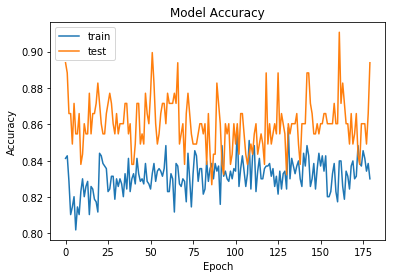

In [212]:
# summarizing historical accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

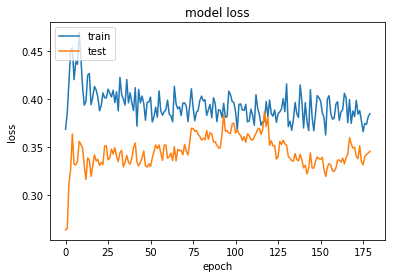

In [213]:
# summarize history for loss
"""
当用训练数据执行神经网络达到
"""
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [128]:
y_pred = model.predict(X_test)
y_pred

LogReg: 0.829444 (+/- 0.015722)
XGBClassifier: 0.820404 (+/- 0.019012)
KNN: 0.782283 (+/- 0.021518)
DecisionTreeClassifier: 0.800249 (+/- 0.015762)
RandomForestClassifier: 0.811529 (+/- 0.024319)
GradientBoostingClassifier: 0.818195 (+/- 0.020150)
RidgeClassifier: 0.818239 (+/- 0.025687)
BaggingRidgeClassifier: 0.815948 (+/- 0.017041)
ExtraTreesClassifier: 0.806971 (+/- 0.016294)


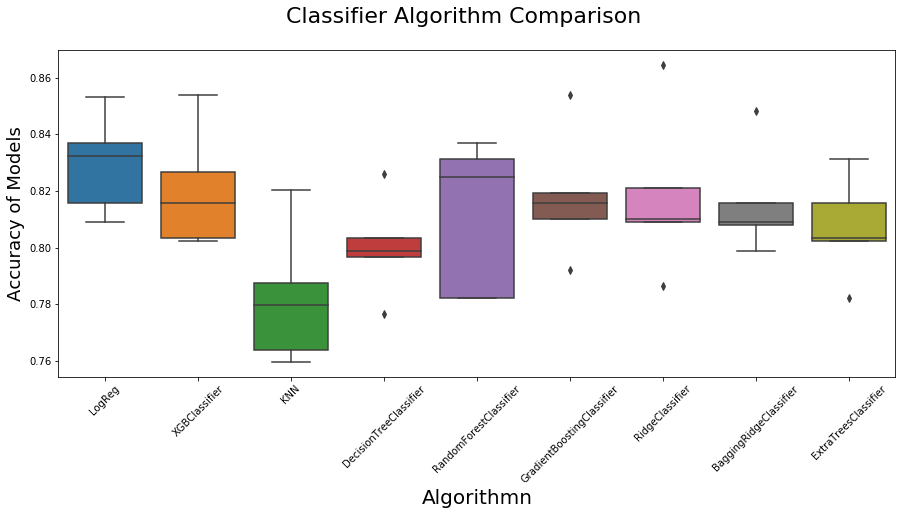

In [129]:
#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier())]))) 
clfs.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),
                       ("KNN", KNeighborsClassifier())]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(max_features=15, n_estimators=150))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier())])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier())])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier())])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'accuracy'
n_folds = 10

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv= 5, scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()